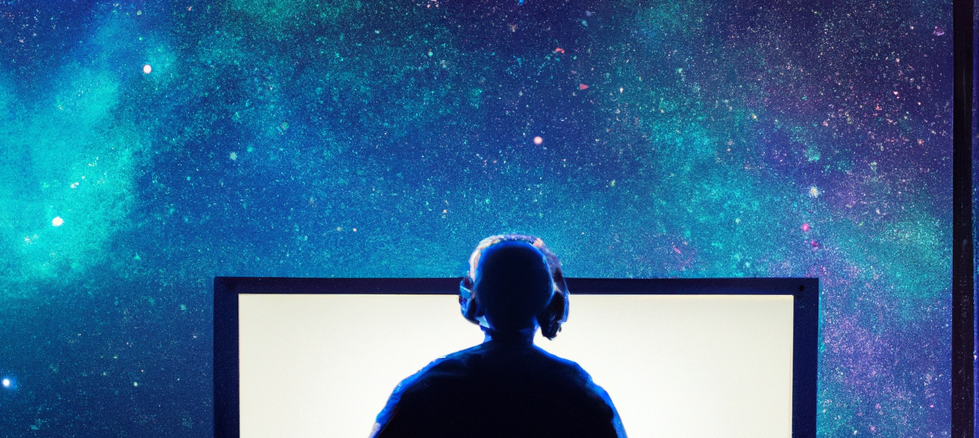

In [4]:
import os
from IPython.display import Image
os.path.join(os.path.expandvars("%userprofile%"),"Documents\\Github\\ml-market-efficiency\\")
Image(filename="./images/title_pic_medium.png")


# Shedding Light on Market Efficiency with ML and Python
#### By Scott Morgan

For the majority of my +13 year career, I've been in the company of fixed income money managers who assert their expertise in evaluating and trading relative value across a company's capital structure. However, despite hearing such claims, I never had tangible proof of this dynamic between asset classes. With the advent of cutting-edge machine learning methodologies, I aim to provide a fresh, albeit informal, perspective on the potential flow of information between different asset classes and quantifiably answer questions like: **"Can a portfolio manager use the changes in company XYZ's high yield bond prices as a leading indicator for XYZ's equity?"**

While this exploration primarily stems from my long-standing intellectual curiosity and the desire to enrich my personal project portfolio, it is worth noting that this article is not intended as a formal commentary on the efficient market hypothesis. Instead, it's a creative foray into understanding inter-asset relationships more deeply through machine learning.

In the following sections we delve into the return profiles and characteristics of major asset classes before turning to the intricacies of market efficiency, its layers, and its significance in the sphere of active management. Leveraging various python libraries, we seek to uncover which, if any, asset classes exhibit informational inefficiencies and if they can be exploited for potential profit. This will setup potential areas of further research covering specific trading strategies and emerging technology.

## Dissecting Market Efficiency and its Implications for Active Portfolio Management
---
The Efficient Market Hypothesis (EMH) has long been at the forefront of financial discourse. Burton Malkiel's notable contribution, positing the stock market as a 'random walk', implies that future stock prices are independent of their past, presenting a formidable challenge to anyone seeking an edge in predicting market movements. This is expounded through three layers of market efficiency:

- **Weak Form**: Proposes past price and volume data can't forecast future prices.

- **Semi-Strong Form**: Suggests all publicly accessible information is factored into asset prices.

- **Strong Form**: Contends that every piece of information, public or private, is already reflected in asset prices.


This theoretical framework has significant implications for active portfolio managers. Newer entrants, like algorithmic traders and robo-advisors, have ramped up competition, diminishing the traditional informational edge of human managers. The swift action of these technologically-equipped entities makes the window to exploit market inefficiencies exceedingly small. Additionally, the mounting popularity of passive, cost-efficient mechanisms, like index funds, has put active managers' fees and performance under intense scrutiny.

Historically, the primary asset classes available to investors consisted broadly of stocks and bond. Today, the financial landscape has broadened to include developing and emerging market asset classes of varying sizes and styles, making the world of investment more diverse yet complex. For active managers, this diversification means new opportunities but also novel challenges and risks.

Next, we begin our exploratory data analysis (EDA) by examining return distributions, drawdowns and correlations for a number of major asset classes. Understanding these areas will offer insights into potential risks, rewards, and the interplay among different investment avenues. 

***Let's import our functions and start the analysis! Please feel free to reference this Jupyter notebook via my github: https://github.com/ScottMorgan85/ml-market-efficiency***

In [5]:
from utils.helpers import *
from utils.data_import_and_processing import *
from utils.visualization import *

import importlib
import utils.market_efficiency_tests
importlib.reload(utils.market_efficiency_tests)
from utils.market_efficiency_tests import *

index_prices, index_returns = fetch_and_save_data(tickers, start_date, end_date, index_prices_path, index_returns_path)
lagged_targets = generate_lagged_returns_and_targets(index_returns)
combined_data = generate_and_combine(index_prices,lagged_targets)

Data loaded from existing CSV files.
Data import process completed.
Feature engineering completed.


## Exploratory Data Analysis
---
### The Landscape of Asset Class Returns

We start our EDA by collecting asset class returns spanning approximately 20 years of daily data. Ideally, we'd like financial market return data to mimic a normal distribution: predominantly smaller gains, fewer small losses, and minimal large swings or volatility - though is rarely the case in reality. 

Certain characteristics hint at possible inefficiencies. Two terms we discuss are skewness and kurtosis:

#### Definition(s) & Context

##### Skewness
- **Reference Range:** Typically lies between -3 and +3.
  - Values closer to 0 suggest symmetry.
  - Negative values suggest potential for occasional large losses, hinting at potential inefficiencies in pricing specific risks.
  - Positive values indicate the possibility of periodic significant gains.
  
##### Kurtosis
- **Reference Range:** A value around 3 indicates a normal distribution.
  - Values significantly greater than 3 suggest a distribution with tails heavier than a normal distribution, indicating more extreme returns.
  - Values less than 3 imply a distribution with lighter tails, signifying fewer extreme returns.
  
With this backdrop in mind:

- **US Bank Loans:** The kurtosis value of 93.23 is notably high, hinting at extremely atypical return fluctuations, influenced solely by 11 outlier days from early 2020 during the onset of the COVID-19 pandemic. The pronounced negative skewness indicates the likelihood of large downturns, signaling potential inefficiencies. I do not remove these outliers when building predictive models in the coming sections to preserve the integrity of the dataset and accurately capture the real-world dynamics of the asset class.

- **US High Yield Bonds and Emerging Market Debt:** These classes display significant kurtosis values, suggesting they experience more extreme return variations. Their negative skews indicate potential downside risks, implying inefficiencies in these markets.

- **US Large Cap Equities, US Small Cap Equities, and Emerging Market Equities:** These assets exhibit relatively mild skewness and kurtosis values, aligning more closely with the characteristics of a typical distribution.

In the following section, the analysis is taken a step further with discussion of **drawdown** by asset class. 


                            Skewness   Kurtosis
US Large Cap Equities      -0.361336  11.111269
US Small Cap Equities      -0.420484   6.690497
US Investment Grade Bonds  -0.707514   6.989607
US High Yield Bonds        -1.567971  25.884649
US Bank Loans              -4.337148  92.514116
Developed Country Equities -0.094855  12.244390
Emerging Market Equities   -0.114532  11.086358
Emerging Market Debt       -1.988816  27.250750


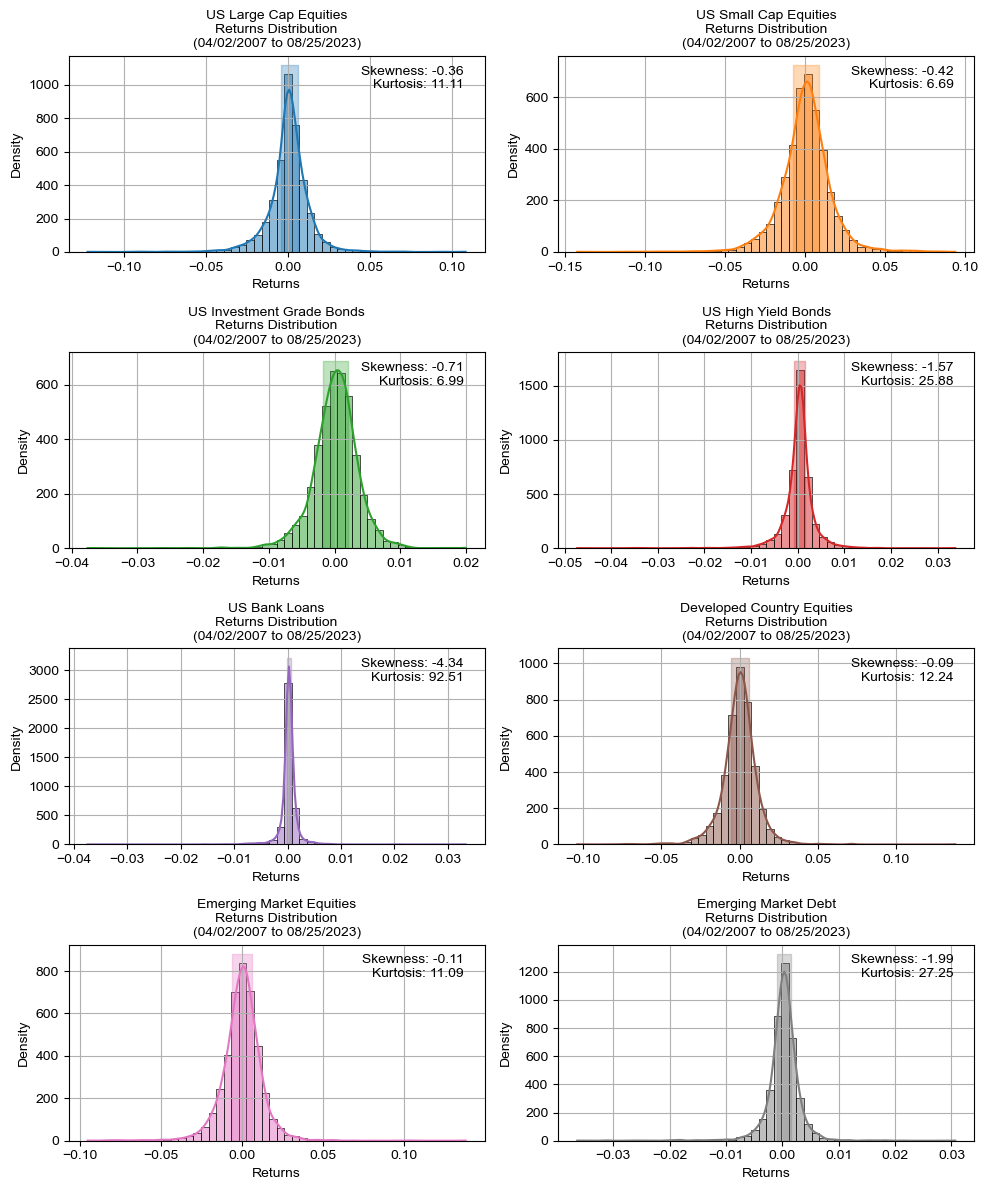

In [6]:
# Now, calculate skewness and kurtosis
skew_kurt_df = calculate_skewness_kurtosis(index_returns)

# Proceed to plot the distribution
plot_distribution(index_returns, skew_kurt_df, start_date, end_date)

### Unraveling Drawdown Dynamics: A Mirror to Market Efficiency?

Understanding drawdown is pivotal in dissecting the behavior of asset classes. At its core, a drawdown represents the decline from a peak to a trough in the value of an investment, signaling the potential downside risk an investor could face.

#### Definition(s) & Context
- **Drawdown:**  The decline from a peak to a trough in the value of an investment, signaling the potential downside risk an investor could face. Reflects the **risk of loss** an asset might present.
- **Market Efficiency:** A lower drawdown typically suggests **stability**, but it can also hint at inefficiencies when juxtaposed against other metrics.

Given this backdrop (see below drawdown chart):

- **US High Yield Bonds and US Bank Loans:** Despite showing signs of potential inefficiency in their return distributions, they have some of the smallest drawdowns. This contrast poses questions:
  - Is their market or instrument structure inherently stable, allowing such drawdown dynamics?
  - Do these apparent inefficiencies, paradoxically, stabilize these markets or are there other factors at play?

From an investment strategy standpoint:

- Assets with smaller drawdowns, even if showing potential inefficiencies, become attractive. They signal the possibility to exploit mispricings while also ensuring a more stable performance trajectory.

The subsequent sections will discussion the correlations among the asset classes for the analysis time period.

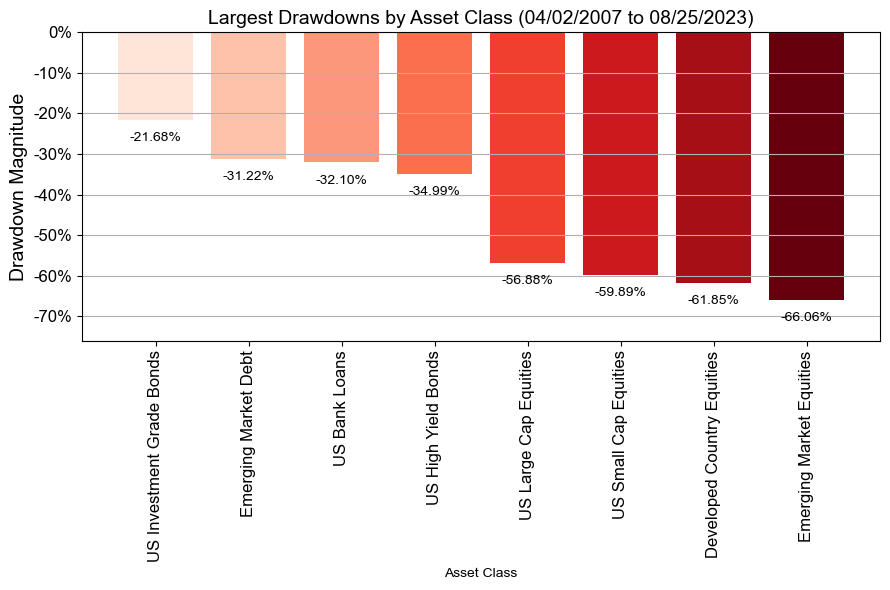

In [7]:
plot_drawdowns(index_returns, start_date, end_date)

### Correlation Analysis: A Lens to Market Efficiency

At the heart of understanding market dynamics is the concept of correlation. It measures how asset class returns move in relation to each other over time.

#### Definition(s) & Context
- **Correlation:** Indicates the strength and direction of the linear relationship between two asset classes. A value closer to 1 means they move together; closer to -1 means they move in opposite directions.
- **Diversification:** Identifying assets that don't move in lockstep can help in constructing portfolios that balance risk.
- **Market Efficiency:** Highly correlated assets might be responding to similar market information, while assets with low or negative correlations could be influenced by different factors.

Given this backdrop (see below correlation matrix):

- <span style="color:green">**US Large Cap Equities and US Small Cap Equities:** A high correlation of 0.917 underscores their synchronized movement, suggesting they might be influenced by similar market dynamics.</span>
  
- **US Investment Grade Bonds:** Displaying a mild negative correlation with both Large and Small Cap Equities, these bonds offer diversification benefits thanks to the differing driving factors versus equity markets.

- <span style="color:green">**US High Yield Bonds and US Bank Loans:** Their strong positive relationship of 0.73 suggests a similar risk and return profile, echoing shared market influences.</span>

- <span style="color:green">**Emerging Market Equities and Developed Country Equities:** A correlation coefficient of 0.782 indicates they often move in harmony, which is likely due to shared global factors impacting them.</span>

These correlation patterns not only inform asset allocation decisions but also pave the way for deeper dives into market efficiency. Understanding these interconnections can unveil potential anomalies in the ways markets process and reflect information.


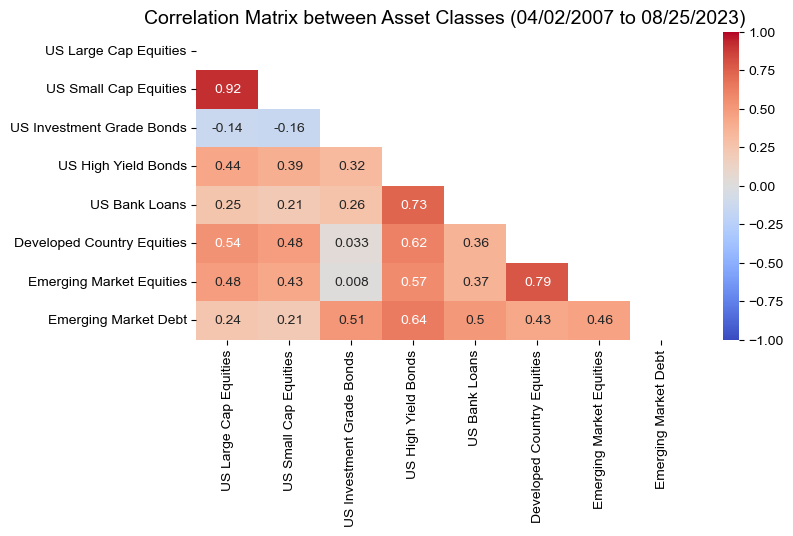

In [8]:
plot_correlation(index_returns, start_date, end_date)

## Analytical Deep Dive: Efficiency Variations Across Asset Classes
---

### Weak Form Efficiency and Autocorrelation Insights

#### Background and Motivation
Autocorrelation measures the **relationship of an asset's current returns with its past returns**. Significant autocorrelation indicates past returns might predict future returns. This challenges the **weak form of the Efficient Market Hypothesis (EMH)**, which posits asset prices incorporate all historical data.

####  Methodology
Autocorrelation, or serial correlation, quantifies how a time series, like stock returns, correlates with a lagged version of itself. By checking how today's returns relate to yesterday's (or those of days prior), we can gauge if past price movements offer any predictive power. Graphically, when points in the Autocorrelation Function (ACF) plot exceed the blue shaded regions, it signals significant autocorrelation - see charts below. This becomes instrumental in detecting patterns like momentum or mean reversion in financial data.

#### Weak Form Results

- **US Large and Small Cap Equities:** Show initial negative autocorrelation, hinting at mean reversion tendencies.
  
- **US Investment Grade Bonds:** Display potential momentum with initial positive autocorrelation.

- <span style="color:green">**US High Yield Bonds, US Bank Loans**: Strong positive autocorrelation across multiple lags suggests potential inefficiencies or return predictability.</span>
  
- **Developed Country and Emerging Market Equities:** Present a mixed dynamic, hinting at potential inefficiencies.

- <span style="color:green">**Emerging Market Debt:** Displays momentum, especially in initial lags, similar to High Yield Bonds.</span>

#### Weak Form Conclusion

***US High Yield Bonds, US Bank Loans, and Emerging Market Debt***, during the evaluated period, suggest past returns might be indicative of future returns, hinting at potential inefficiencies. This is particularly interesting when considering that these are predominantly corporate debt markets. One hypothesis for this observed pattern could be the structural similarities within corporate debt markets. These markets, often characterized by less liquidity than equity markets and more pronounced responses to economic news and credit events, might exhibit more pronounced autocorrelations. This could be a manifestation of information dissemination being somewhat slower in these markets due to institutional constraints or the specific nature of debt instruments. Other asset classes align more with the weak form of EMH.

While the weak form of EMH focuses on historical price and volume data, the **semi-strong form** goes a step further. It posits that asset prices incorporate **all publicly available information**. In the next section, we'll explore predictive modeling techniques to test this layer of market efficiency.

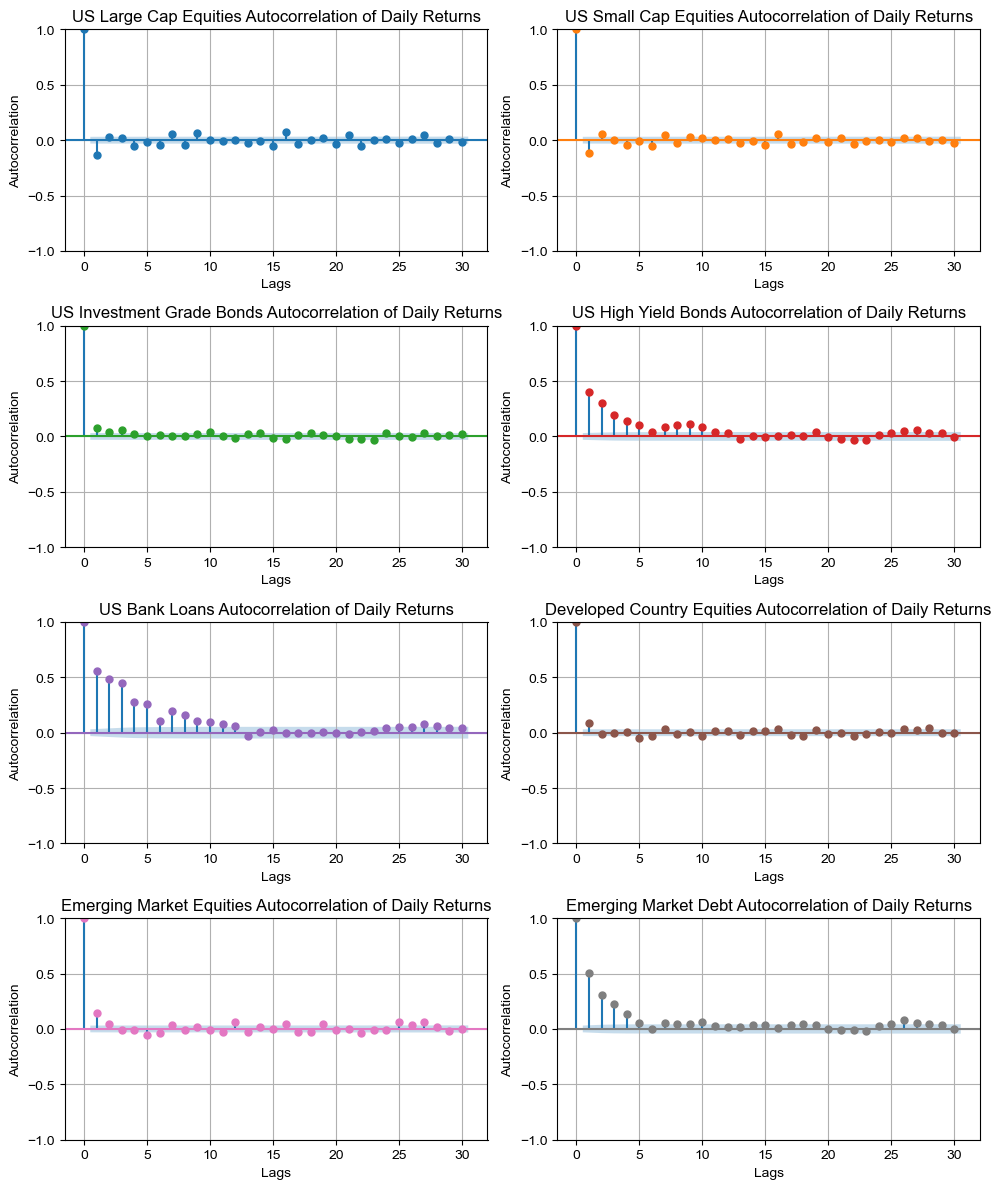

In [9]:
plot_autocorrelation(index_returns, readable_names)

### Probing Semi-Strong Efficiency Through Predictive Modeling

#### Background and Motivation
Financial markets are complex systems where countless factors interplay. The **semi-strong form** of the Efficient Market Hypothesis (EMH) posits that asset prices adjust rapidly to **all publicly available** information. If an asset's price doesn't fully incorporate this information, opportunities might arise for traders to exploit and potentially earn above-average returns.

**Why Predictive Models?**
- Machine learning models can probe the market's response to public information by trying to predict future prices or returns based on historical data.
- If a model can consistently predict future returns from past information with a high accuracy (>50%), it suggests that the asset class doesn't incorporate event-related data rapidly, challenging the semi-strong form of EMH.

#### Methodology
**Model**: XGBoost classifier was employed, prized for its adaptability and lucidity in representation.

**Features**: Incorporated historical technical indicators such as SMA (Simple Moving Average), EMA (Exponential Moving Average), RSI (Relative Strength Index), and MACD (Moving Average Convergence Divergence).

**Target Variable**: The target varible is the next day's binary return by asset class (1 if the next day return is >0%, otherwise 0), reducing the prediction to a directional trend rather than exact magnitude, to mitigate the influence of noisy data.

**Evaluation Metric - F1 Score:**
- Both false positives (erroneously predicting a price rise) and false negatives (missing out on a genuine price rise) can be costly in financial markets.
- The F1 Score balances precision (accuracy of positive predictions) and recall (proportion of actual positives identified correctly).
- Evaluating F1 across different intervals — **5, 30, 60, and 90 days** — shows how long post-event our models maintain accuracy, enabling insights into how quickly markets incorporate new public information.

**Test and Train Periods:** 
- **Train Period (Non-Event Days):** Timeframes where no significant public events occurred, allowing models to learn the typical patterns of asset class returns.

- **Test Period (Event Days):** Periods following significant public announcements or events. It's the critical window where we test if the patterns learned during non-event days can predict returns after new public information.

Below are the major events and their respective start dates in a table and interactive visual:

| Event                    | Event Date  |
|--------------------------|-------------|
| Lehman Collapse          | 2008-09-15  |
| ECB QE Announcement      | 2015-01-22  |
| Brexit Vote              | 2016-06-23  |
| COVID-19 Pandemic        | 2020-03-11  |
| Russia-Ukraine/Fed Hikes | 2022-02-25  |
| SVB Collapse             | 2023-03-10  |


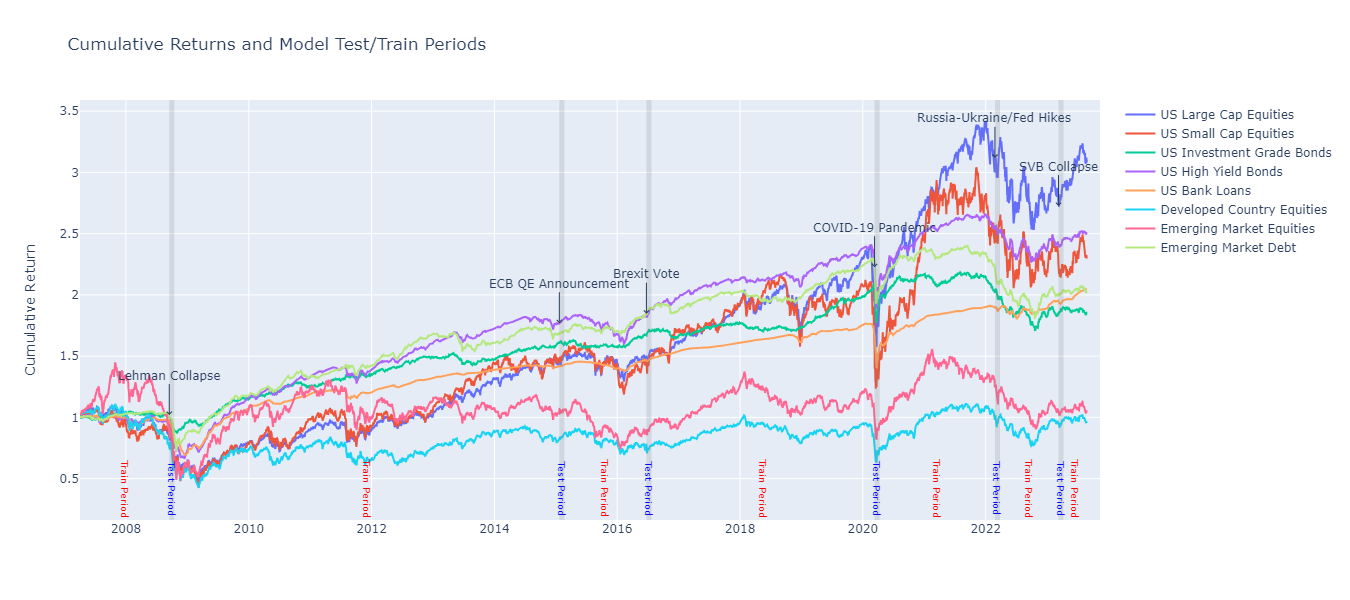

In [12]:
plot_cumulative_returns_with_events(index_returns)

In [13]:
#run XGBoost Models
final_table, xgb_styled_evaluation_df = xgb_display_styled_evaluation(combined_data,highlight_f1)

Main function started
Training US Large Cap Equities 5 day XGBoost model...
Training US Small Cap Equities 5 day XGBoost model...
Training US Investment Grade Bonds 5 day XGBoost model...
Training US High Yield Bonds 5 day XGBoost model...
Training US Bank Loans 5 day XGBoost model...
Training Developed Country Equities 5 day XGBoost model...
Training Emerging Market Equities 5 day XGBoost model...
Training Emerging Market Debt 5 day XGBoost model...
Training US Large Cap Equities 30 day XGBoost model...
Training US Small Cap Equities 30 day XGBoost model...
Training US Investment Grade Bonds 30 day XGBoost model...
Training US High Yield Bonds 30 day XGBoost model...
Training US Bank Loans 30 day XGBoost model...
Training Developed Country Equities 30 day XGBoost model...
Training Emerging Market Equities 30 day XGBoost model...
Training Emerging Market Debt 30 day XGBoost model...
Training US Large Cap Equities 60 day XGBoost model...
Training US Small Cap Equities 60 day XGBoost mod

#### Semi-Strong Results

In [14]:
xgb_styled_evaluation_df

> <span style="color:green">**Key Observation**: US Bank Loans emerge as the best performer, on average.</span>

The F1 scores, indicative of the balance between precision and recall, for various asset classes at different time intervals after events are as follows:

***Result Highlights***
- **US Large Cap Equities:** F1 scores suggest a trend towards randomness, but with some fluctuations.
  
- **US Small Cap Equities:** More pronounced volatility in shorter time frames, stabilizing over longer durations.

- **US Investment Grade Bonds:** Moderate efficiency over the periods.
  
- <span style="color:green"> **US High Yield Bonds & US Bank Loans:** Scores considerably above 0.5 hint at inefficiencies. This suggests room for investors to potentially capitalize on certain patterns or information.</span>
  
- **Developed Country Equities, Emerging Market Equities, and Emerging Market Debt:** Scores around 0.5 to 0.6 range, indicating some randomness with hints of patterns, especially in longer time frames.


#### Semi-Strong Conclusion
While certain asset classes like US Large Cap Equities and US Small Cap Equities seem to align more closely with the semi-strong form of the EMH, others, particularly **US High Yield Bonds** and **US Bank Loans**, indicate potential market inefficiencies. Interestingly, given that these are corporate debt markets, there might be structural similarities or characteristics that account for the observed patterns.

It's essential to note that these findings are based on the results from a single algorithm (XGBoost) without hyperparameter tuning. The insights might become more robust with a comprehensive exploration involving algorithm tuning and experimenting with various algorithms beyond XGBoost. Our analysis is not exhaustive, and additional modeling approaches could reveal further nuances in market efficiency.

As we near the end of anaysis, we'll utilize transfer learning to test the strong form efficiency, exploring if patterns recognized in one asset class can be translated and exploited in others.

### Strong Form Efficiency and Transfer Learning Insights

In [15]:
#run keras Models
final_table, keras_styled_evaluation_df = keras_display_styled_evaluation(combined_data,highlight_f1)

#run transfer learning scoring 
transfer_final_table,transfer_styled_evaluation_df = transfer_display_styled_evaluation(combined_data, highlight_f1)

Main function started
Training US Large Cap Equities 5 day Keras model...
Training US Small Cap Equities 5 day Keras model...
Training US Investment Grade Bonds 5 day Keras model...
Training US High Yield Bonds 5 day Keras model...
Training US Bank Loans 5 day Keras model...
Training Developed Country Equities 5 day Keras model...
Training Emerging Market Equities 5 day Keras model...
Training Emerging Market Debt 5 day Keras model...
Training US Large Cap Equities 30 day Keras model...
Training US Small Cap Equities 30 day Keras model...
Training US Investment Grade Bonds 30 day Keras model...
Training US High Yield Bonds 30 day Keras model...
Training US Bank Loans 30 day Keras model...
Training Developed Country Equities 30 day Keras model...
Training Emerging Market Equities 30 day Keras model...
Training Emerging Market Debt 30 day Keras model...
Training US Large Cap Equities 60 day Keras model...
Training US Small Cap Equities 60 day Keras model...
Training US Investment Grade B

<!-- Image(filename="./images/strong_visual.png") -->
#### Background and Motivation
While the weak and semi-strong forms of EMH deal with historical price data and all publicly available information, respectively, the **strong form** posits that prices instantly reflect *all* information: public and private. However, if a pattern learned in one asset class (like US Bank Loans) can predict returns in another asset class, it might suggest that not all information is incorporated instantly — hence, challenging the strong form of EMH.

#### Methodology
**Transfer Learning**:
- Transfer Learning leverages patterns or knowledge learned from one task and applies it to a different, yet related, task.
- In our context, the model trained on US Bank Loans will be applied to other asset classes. The rationale: if the patterns recognized in US Bank Loans (source domain) can be used to predict the returns of another asset class (target domain), it might indicate shared underlying inefficiencies or structures across the markets.

**Why Keras and Not XGBoost?**:
- Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. Given its flexibility, we reran our models using Keras, which offers more sophisticated architectures, especially suitable for transfer learning.

- After re-running the models, Bank Loans still emerged as the top-performing asset class, aligning with our XGBoost findings:

| F1 Metrics for Keras Across Different Time Intervals | 5 days | 30 days | 60 days | 90 days | Average F1 |
|------------------------------------------------------|:------:|:-------:|:-------:|:-------:|:----------:|
| US Large Cap Equities                               | 0.61   | 0.68    | 0.66    | 0.69    | 0.66       |
| US Small Cap Equities                               | 0.65   | 0.55    | 0.62    | 0.68    | 0.63       |
| US Investment Grade Bonds                           | 0.68   | 0.61    | 0.60    | 0.68    | 0.65       |
| US High Yield Bonds                                 | 0.64   | 0.77    | 0.72    | 0.70    | 0.71       |
| US Bank Loans                                       | 0.67   | 0.82    | 0.80    | 0.78    | 0.76       |
| Developed Country Equities                          | 0.55   | 0.70    | 0.55    | 0.52    | 0.58       |
| Emerging Market Equities                            | 0.50   | 0.56    | 0.65    | 0.66    | 0.59       |
| Emerging Market Debt                                | 0.53   | 0.63    | 0.65    | 0.68    | 0.62       |

#### Strong Form Results

Using the Keras model trained on bank loans, we scored the other asset classes' data. This tests the hypothesis that if patterns learned from the bank loan asset class can be applied effectively to other asset classes, then there are inefficiencies that aren't accounted for by public information alone.

In [27]:
from IPython.display import display, Markdown

# Rounding the dataframe to two decimal places
transfer_final_table_formatted = transfer_final_table_formatted.round(2)

# Displaying with a bold title
display(Markdown("**Transfer Learning F1 Metrics for Keras Using Base US Bank Loan Model**"))
display(transfer_final_table_formatted)


**Transfer Learning F1 Metrics for Keras Using Base US Bank Loan Model**

5 days  30 days  60 days  90 days
US Large Cap Equities         0.47     0.63     0.51     0.63
US Small Cap Equities         0.37     0.60     0.53     0.65
US Investment Grade Bonds     0.83     0.63     0.52     0.67
US High Yield Bonds           0.59     0.78     0.61     0.71
Developed Country Equities    0.52     0.67     0.65     0.67
Emerging Market Equities      0.62     0.59     0.62     0.66
Emerging Market Debt          0.67     0.58     0.58     0.69

#### Strong Form Conclusion

Given that some bank loan companies are private and might possess material non-public information, the use of data from this asset class could mean the model is tapping into information patterns not fully available or understood by the broader market. If transfer learning models consistently and significantly outperform the market by leveraging this data, it would suggest the potential presence of inefficiencies in the market's pricing of public information, even if not a direct contradiction of the strong form of the EMH.

However, it's essential to approach such conclusions with caution. Above-average accuracy metrics might be due to overfitting, specific market conditions, or other nuances. Furthermore, while back-tested results can be promising, real-world trading, with its associated costs and complexities, can present a different picture.

## Final Thoughts

#### Practical Implications
knowing that the US Bank Loans model exhibits predictive capability offers several actionable strategies:

- **Equity vs. Debt Dynamics:** For a company like AT&T Inc., investors can monitor discrepancies between model predictions for its bank loans and its stock. For instance:
  - If the model anticipates positive returns for AT&T's bank loans but negative for its equity, it could suggest stronger company financials than what the equity market recognizes. In such a scenario, a portfolio manager could consider going long on AT&T bonds while taking a hedged position on its equity.

- **ETF Strategies:** Rather than merely going long on an ETF that tracks US Bank Loans, investors could:
  - Engage in **pair trading** with ETFs, where they go long on a US Bank Loan ETF and short on another ETF, say one tracking US High Yield Bonds, based on relative model predictions.
  - Use **leverage** with ETFs that offer it, amplifying potential returns based on strong model predictions, while always being cautious of the increased risk.

- **Leading Indicators:** Using companies with complex capital structures, such as Walmart, as an example:
  - If the model predicts positive returns for Walmart's bank loans and those loans historically act as leading indicators, portfolio managers might consider adjusting their equity or bond positions in Walmart in anticipation of similar movements.

#### Assumptions and Limitations
- The analysis is constrained to a specific timeframe. Market dynamics and efficiencies can evolve over longer periods.
- The study assumes that the selected events have a significant impact on the asset classes. However, other unconsidered events or underlying factors could influence the results.
- We've predominantly relied on the F1 score as an evaluation metric, and while comprehensive, it's just one of many potential evaluation methods.

#### Recommendation for Future Works/Research:

- Company-Specific Models: Companies like Apple Inc., Microsoft Corporation, AT&T Inc., Amazon Inc., and Walmart Inc. can be examined in-depth. Their unique capital structures and reactions to market events can offer nuanced insights, making them perfect subjects for future research.

- Variable Importance: Understanding which features most sway the model's predictions can provide clarity on market dynamics and potential inefficiencies.

- Diverse Event Selections: Incorporating a broader array of market events and integrating a more extensive spectrum of predictive modeling techniques can further refine the analysis.

#### The Next Frontier: Generative AI in Financial Markets

Generative AI, particularly models like AutoGPT, have been at the forefront of simulating complex data structures and generating novel content in various domains. Applying this to financial markets opens a realm of innovative possibilities:

- **Synthetic Data Generation:** Generative AI can produce synthetic financial datasets that mimic real-world market conditions. These datasets can be used for back-testing trading strategies, ensuring strategies are robust even against unobserved scenarios.

- **Scenario Simulation for Market Shocks:** Using historical data, generative models can extrapolate and simulate potential market shocks or black swan events. Research analysts can use these simulations to study potential vulnerabilities in current market structures and test the market's efficiency in reacting to unprecedented events.

- **Sentiment Analysis Enhancement with AutoGPT:** While traditional sentiment analysis tools rely on existing labeled datasets, generative models like AutoGPT can augment these datasets or generate hypothetical news articles. Portfolio managers can then assess how these generated news pieces might impact asset prices, providing a dynamic way to stress-test asset sensitivity to news flow.

- **Strategy Ideation:** For research analysts feeling stuck in a rut, generative AI can provide new trade ideas or investment theses based on the vast amount of financial literature it can be trained on. By feeding it with historical trade patterns, market conditions, and academic literature, AutoGPT can suggest novel strategies or combinations that might not be immediately intuitive.

- **Efficiency Analysis:** Generative AI can be programmed to generate a series of investment decisions based on historical data. By comparing the performance of this AI-generated series with real-world data, analysts can get insights into market efficiency. If the AI consistently outperforms the market, it might suggest inefficiencies.

This integration of generative AI, especially tools like AutoGPT, offers a fresh perspective in dissecting and understanding the intricacies of market dynamics. As these technologies continue to evolve, their role in shaping financial research and portfolio management strategies will only grow more significant.


## Contact information

scott@scottmmorgan.com

https://www.linkedin.com/in/scottmmorgan/

 I constructed a number of trailing technical features from the historical price data of the asset classes. These are the independent variables. For the targets, or dependent variables, I used the next day (t+1) returns of the respective indexes. Below are the descriptions of each.
 
<u>**Dependent Variables**</u>
- **SMA (Simple Moving Average):** The average price of an n asset over a specific number of days. It's "simple" because each day's price has equal weight.

- **EMA (Exponential Moving Average):** Similar to SMA, but it gives more weight to recent prices. This responsiveness means EMA reacts more quickly to price changes than SMA.

- **RSI (Relative Strength Index):** A momentum oscillator ranging from 0 to 100, indicating the speed and change of price movements. Typically, an RSI above 70 suggests an asset might be overbought, while an RSI below 30 suggests it might be oversold.

- **MACD (Moving Average Convergence Divergence):** A trend-following momentum indicator, represented by the difference between a short-term EMA and a long-term EMA. MACD signals are typically derived from its crossovers with its signal line (an EMA of the MACD itself).

<u>**Targets/Dependent Variables**</u>
- **Next Day Returns:** The target variables are the next day (t+1) returns of the respective indexes. I chose to use future returns versus prices because predicting returns is more feasible; returns capture relative changes and inherent volatility, providing clearer insight into an asset's dynamic behavior. Next, I transformed the returns into binary variables: '1' for a positive return and '0' for a negative return. By converting continuous next-day returns into binary indicators, we focus on predicting directional trends rather than exact magnitudes, simplifying the modeling process and reducing noise.

<u>**Evaluation**</u>

We evaluate the models at T+5 days, T+30 days, T+60 days and T+90 days. By testing the model's performance across varying time periods after an event, I am examining the speed at which new information is incorporated into prices across different asset classes. If a model consistently generates accurate predictions greater than 50% long after an event, it could indicate inefficiencies in the market or that the market is taking longer to assimilate the new information, which would challenge the semi-strong form of the EMH.

In evaluating the models across different time periods, the primary metric of interest remains the F1 Score. This metric becomes especially significant in contexts like financial trading where both types of errors – false positives (erroneously buying) and false negatives (missing out on a genuine buying opportunity) – are financially penalizing. The F1 Score serves as an optimal metric because it is the harmonic mean of precision and recall, ensuring that a model not only provides trustworthy positive predictions (signifying high precision) but also efficiently identifies the majority of genuine positive opportunities (indicating high recall). 

While we have multiple metrics at our disposal, the dynamic nature of financial markets necessitates the exploration of models across varied time frames. This is crucial as different periods might unveil diverse patterns or anomalies. By identifying the top-performing model across the most relevant time frame for our strong form tests, we're better positioned to harness potential market efficiencies or pinpoint areas of exploitability.

In [ ]:
#Run XGBoost Models
final_table, styled_evaluation_df = display_styled_evaluation(combined_data, highlight_f1)

#### Semi-Strong Findings

The results suggest a nuanced understanding of market efficiency across different time intervals. 

- For US Large Cap Equities, the F1 scores progressively increased from 0.64 over 5 days to 0.56 over 90 days. While this indicates a trend towards randomness and supports the semi-strong form of the Efficient Market Hypothesis (EMH), there are fluctuations that warrant closer examination. On the other hand, US Small Cap Equities exhibited scores ranging from 0.45 to 0.52, showcasing more pronounced volatility in shorter time frames, which stabilizes over longer durations.

- US Investment Grade Bonds, with F1 scores ranging from 0.43 to 0.55, exhibit moderate efficiencies over the tested time intervals. However, **US High Yield Bonds and US Bank Loans, displaying scores like 0.62 and 0.75, respectively, over a 90-day period, reinforce the earlier observation of stronger pattern recognition capabilities. These scores, being considerably above the 0.5 mark, suggest potential inefficiencies in these markets. It implies that there's room for investors or traders to potentially capitalize on certain patterns or information.**

- Developed Country Equities, Emerging Market Equities, and Emerging Market Debt display scores that hover around the 0.5 to 0.6 range, suggesting a degree of randomness but with some hints of pattern recognition, especially in the longer time frames. This could be indicative of semi-strong market efficiency, but the door remains open for further analysis and scrutiny.

To summarize, while some asset classes seem to align more closely with the semi-strong form of the EMH, others, especially US High Yield Bonds and US Bank Loans, indicate potential market inefficiencies that might be exploitable.

A few caveats to bear in mind:

- **1** These results do not provide definitive proof regarding the EMH but rather offer insights into varying efficiency levels across asset classes.

- **2** The models weren't subjected to hyperparameter tuning, which could potentially enhance their performance and provideclearer insights.
 
Next, I will leverage transfer learning to test strong form efficiency, capitalizing on the top performing model (in this case, US Bank Loans, given its high F1 score) and applying it to other assets. This would test the hypothesis of whether patterns recognized in one asset class can be translated and exploited in others, further challenging the tenets of the EMH.

### Strong Form Efficiency & Transfer Learning

In [ ]:
Image(filename="./images/strong_visual.png")

The strong form of market efficiency posits that all information, public and private, is instantly reflected in asset prices. Testing this hypothesis requires examining whether models trained on one set of data (say, public data) can generalize and make predictions on another set (potentially mimicking private information scenarios). Transfer learning is a natural fit for this kind of evaluation.
<!-- 
<center>
<img src="attachment:f4fc5060-33aa-4984-a10c-2d2d1a5f82c9.png" style="width: 600px">
</center> -->




#### Methodology

Historically a powerhouse technique in deep learning, especially in the domain of image and language processing, transfer learning allows models trained on one dataset to apply their knowledge to a different, though related, dataset. In our context, this means leveraging the patterns and intricacies learned from one asset class, such as bank loans, to potentially enhance the model's predictive capability on another, like equities or bonds. The underlying assumption is that there might be hidden, overarching market dynamics or patterns that are universal across different asset classes.

The choice of using transfer learning is multifaceted. Not only does it provide an opportunity to harness the potential cross-asset predictive power, but it also challenges the very core of the strong form market efficiency. If our models, armed with transfer learning, can consistently outperform the market, it might suggest that there are inefficiencies, or at least patterns, that even sophisticated market participants haven't fully grasped.

I initially turned to the XGBoost algorithm, famed for its precision and adaptability. Yet, the intricate temporal dynamics and complex non-linearities inherent in financial data exposed its limitations. Financial markets, with their multifaceted interactions and time-sensitive structures, demand models that can capture depth and complexity. Enter Keras deep learning models. These models, equipped with capabilities to automatically discern crucial features, adeptly handle sequential data, and intricately model inter-variable relationships, emerged as a more suitable choice. This shift from XGBoost to a Keras-based approach underscores the criticality of aligning the modeling tool with the complexities of the task, especially in the enigmatic realm of finance. 

So in order to complete this series of tests, I had to retrain our XGBoost models using Keras. The results are below and are similar to our original results, with US Leveraged Loans outperforming and will therefore be used as our base model. Transfer learning comes into play when we adapt the US Leveraged Loan model to other asset classes. If this adapted model also performs well on other asset classes, it might suggest that certain information is consistently not being incorporated across multiple asset classes.

#### Strong Form Findings

In [ ]:
#Run Keras Models
final_table, styled_evaluation_df = keras_display_styled_evaluation(combined_data, highlight_f1)

In [ ]:
transfer_display_styled_evaluation(combined_data, highlight_f1)